# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [3]:
# Slope: m_hat = (x_bar*x_y - xy_bar) / (x_bar)^2 - (x^2_bar)

def calc_slope(xs, ys):

    num = np.mean(xs)*np.mean(ys) - np.mean(xs*ys)
    
    deno = (np.mean(xs))**2 - np.mean(xs**2)
    
    m = num / deno
    
    return m


In [4]:
# Intercept: c_hat = y_bar - m_hat*x_bar

def best_fit(xs, ys):

    m = calc_slope(xs, ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

In [5]:
# Prediction: y_hat = m_hat*x + c_hat

def reg_line (m, c, X):
    
    return [(m*x)+c for x in X]

In [6]:
# SSE = (yi-y_hat)^2

def sum_sq_err(ys_real, ys_predicted):

    sse = np.sum((ys_real - ys_predicted)**2)
    
    return sse

In [7]:
# R^2 = 1- sum(yi-y_hat)^2 / sum(yi-y_hat)^2

def r_squared(ys_real, ys_predicted):

    num = sum_sq_err(ys_real, ys_predicted)
    denom = np.sum((ys_real - ys_real.mean())**2)
    
    # Calculate r-squared 
    r_sq =  1 - (num/denom)
    return r_sq

In [8]:
def plot_reg(X, Y, Y_pred):
    plt.scatter(X, Y, color='red', label='data')
    plt.plot(X, Y_pred, color='black', label='regression line')
    plt.legend()
    plt.show()
    return None

In [9]:
m, c = best_fit(X, Y)
print("m = ", m)
print("c = ", c)

Y_pred = reg_line(m, c, X)
print("\nY_pred = ", Y_pred)

r_squared = r_squared(Y, Y_pred)
print("\nr_square = ", r_squared)

m =  0.5575757575757568
c =  6.3333333333333375

Y_pred =  [6.890909090909094, 7.448484848484851, 8.006060606060608, 8.563636363636364, 9.121212121212121, 9.67878787878788, 10.236363636363635, 10.793939393939393, 11.351515151515148, 11.909090909090907]

r_square =  0.9715335169880626


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


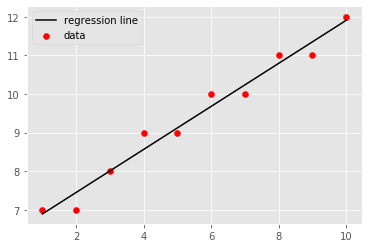

In [10]:
print ('Basic Regression Diagnostics')
print ('----------------------------')
print ('Slope:', round(m, 2))
print ('Y-Intercept:', round(c, 2))
print ('R-Squared:', round(r_squared, 2))
print ('----------------------------')
print ('Model: Y =',round(m, 2),'* X +', round(c, 2))

plot_reg(X, Y, Y_pred)

# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

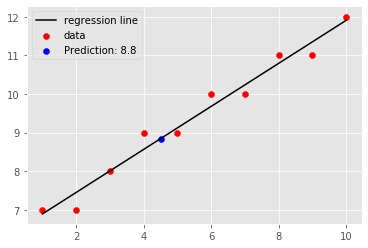

In [11]:
# Make prediction for x = 4.5 and visualize on the scatter plot

x_new = 4.5
y_new = (m*x_new)+c
y_new

plt.scatter(X, Y, color='red', label='data')
plt.plot(X, Y_pred, color='black', label='regression line')
plt.scatter(x_new, y_new, color='blue', label='Prediction: '+ str(np.round(y_new, 1)))
plt.legend()
plt.show()

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 